# problem - 1

### 1.	A glass manufacturing plant uses different earth elements to design new glass materials based on customer requirements. For that, they would like to automate the process of classification as it’s a tedious job to manually classify them. Help the company achieve its objective by correctly classifying the glass type based on the other features using KNN algorithm.

 RI: refractive index3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)4. Mg: Magnesium5. Al: Aluminum6. Si: Silicon7. K: Potassium8. Ca: Calcium9. Ba: Barium10. Fe: Iron11. Type of glass: (class attribute) 1 building_windows_float_processed 2 building_windows_non_float_processed 3 vehicle_windows_float_processed 4 vehicle_windows_non_float_processed (none in this database) 5 containers 6 tableware * 7 headlamps

In [1]:
#import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import joblib, pickle

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read the data into python
glass = pd.read_csv(r"D:\360 Data Science 360DigiTMG\Day23-Datasets_KNN\glass.csv")
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
#size of the dataset
glass.shape

(214, 10)

In [5]:
#information about the dataset
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
#data cleaning
#checking for null values
glass.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
#checking for duplicate values

dup = glass.duplicated()
print(dup)
sum(dup)

0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Length: 214, dtype: bool


1

In [8]:
#dropping the duplicate values
glass = glass.drop_duplicates()

In [9]:
#checking the duplicate values
dup = glass.duplicated()
sum(dup)

0

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(glass.drop('Type',axis=1))

StandardScaler()

In [13]:
scaled_features = scaler.transform(glass.drop('Type',axis=1))

In [14]:
glass_feat = pd.DataFrame(scaled_features,columns=glass.columns[:-1])
glass_feat.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301


In [15]:
#Train Test split

X_train, X_test, Y_train, Y_test = train_test_split(scaled_features,glass['Type'],
                                                    test_size=0.30,random_state=0)

In [16]:
X_train.shape

(149, 9)

In [17]:
X_test.shape

(64, 9)

In [18]:
knn = KNeighborsClassifier(n_neighbors=23)

In [19]:
knn.fit(X_train,Y_train)    # Train the kNN model

KNeighborsClassifier(n_neighbors=23)

In [20]:
pred = knn.predict(X_test)
pred

array([7, 1, 1, 5, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 7, 1, 2, 1, 2, 7, 7,
       7, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 7, 2, 2, 2, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 7, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [21]:
#Performance Metrics On MultiClass Classification Problems

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

[[16  4  0  0  0  0]
 [10 15  0  0  0  0]
 [ 5  3  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  1  0  0  0  1]
 [ 1  0  0  0  0  6]]
              precision    recall  f1-score   support

           1       0.50      0.80      0.62        20
           2       0.62      0.60      0.61        25
           3       0.00      0.00      0.00         8
           5       1.00      0.50      0.67         2
           6       0.00      0.00      0.00         2
           7       0.86      0.86      0.86         7

    accuracy                           0.59        64
   macro avg       0.50      0.46      0.46        64
weighted avg       0.53      0.59      0.55        64



In [22]:
#evaluate the model
print(accuracy_score(Y_test,pred))

0.59375


In [23]:
pd.crosstab(Y_test,pred, rownames=['Acutal'], colnames=['Predictions'])

Predictions,1,2,5,7
Acutal,,,,
1,16,4,0,0
2,10,15,0,0
3,5,3,0,0
5,0,1,1,0
6,0,1,0,1
7,1,0,0,6


In [24]:
# error on train data
pred_train = knn.predict(X_train)
print(accuracy_score(Y_train,pred_train))

0.6510067114093959


In [25]:
pd.crosstab(Y_train,pred_train, rownames=['Actual'],colnames=['Predictions'])

Predictions,1,2,5,6,7
Actual,,,,,
1,45,4,0,0,0
2,21,30,0,0,0
3,6,3,0,0,0
5,5,2,2,1,1
6,5,0,0,2,0
7,3,1,0,0,18


In [26]:
acc = []

for i in range(3,50,2):
    neigh =KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train,Y_train)
    train_acc = np.mean(neigh.predict(X_train) == Y_train)
    test_acc = np.mean(neigh.predict(X_test) == Y_test)
    acc.append([train_acc,test_acc])

In [27]:
acc

[[0.8120805369127517, 0.671875],
 [0.7315436241610739, 0.65625],
 [0.7114093959731543, 0.59375],
 [0.6778523489932886, 0.671875],
 [0.6912751677852349, 0.6875],
 [0.6845637583892618, 0.640625],
 [0.6577181208053692, 0.65625],
 [0.6577181208053692, 0.625],
 [0.6308724832214765, 0.578125],
 [0.6442953020134228, 0.578125],
 [0.6510067114093959, 0.59375],
 [0.6510067114093959, 0.546875],
 [0.5973154362416108, 0.5625],
 [0.6241610738255033, 0.5625],
 [0.6040268456375839, 0.53125],
 [0.5906040268456376, 0.53125],
 [0.5838926174496645, 0.515625],
 [0.5838926174496645, 0.5],
 [0.5771812080536913, 0.5],
 [0.5771812080536913, 0.484375],
 [0.5771812080536913, 0.484375],
 [0.5369127516778524, 0.515625],
 [0.5100671140939598, 0.5],
 [0.5234899328859061, 0.453125]]

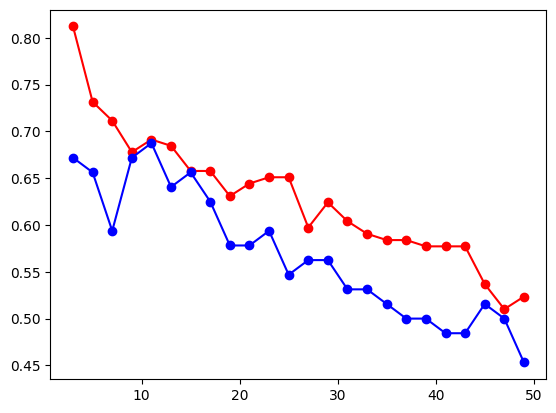

In [28]:
#train data accuracy plot
plt.plot(np.arange(3,50,2), [i[0] for i in acc],'ro-')


#test data accuracy plot
plt.plot(np.arange(3,50,2),[i[1] for i in acc], 'bo-')

On the basis of graph we find that k=15 is the best k value(shortest distance) where, test accuracy = 59%, train accuracy = 65% they both are close enough.
Note: Training accuracy and test accuracy should close like , 98%-97%, not 80%-60%, if equals then good

# Problem - 2 

### A National Zoopark in India is dealing with the problem of segregation of the animals based on the different attributes they have. Build a KNN model to automatically classify the animals. Explain any inferences you draw in the documentation.

In [83]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [84]:
zoo = pd.read_csv(r"D:\360 Data Science 360DigiTMG\Day23-Datasets_KNN\Zoo.csv")
zoo = zoo.iloc[:,1:]
zoo

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [85]:
#normalizing the data
def norm_func(i):
    x =(i-i.min()) / (i.max()-i.min())
    return x

In [86]:
zoo_norm = norm_func(zoo.iloc[:, :-1])

zoo_norm.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,0.355198,0.742574,0.128713,0.435644
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,0.254173,0.439397,0.336552,0.498314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.500000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
# Separating the input and output from the dataset

X = np.array(zoo_norm)  #predictor

Y = np.array(zoo['type'])# target

In [98]:
X

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.]])

In [99]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30,random_state=0)

In [100]:
X_train.shape

(70, 16)

In [101]:
X_test.shape

(31, 16)

In [102]:
# K nearest neighbor
knn = KNeighborsClassifier(n_neighbors=21)
   #train the model
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=21)

In [103]:
#evaluate the model
pred = knn.predict(X_test)
pred

array([7, 4, 4, 1, 1, 1, 2, 4, 1, 1, 7, 1, 2, 7, 4, 2, 1, 7, 2, 4, 2, 4,
       1, 2, 1, 1, 1, 2, 4, 4, 4], dtype=int64)

In [104]:
print(accuracy_score(Y_test, pred))  # Accuracy measure

0.8387096774193549


In [106]:
# Cross table
pd.crosstab(Y_test, pred, rownames = ['Actual'], colnames = ['Predictions']) 

Predictions,1,2,4,7
Actual,,,,
1,11,0,0,0
2,0,6,0,0
3,0,0,2,0
4,0,0,7,0
5,0,0,0,1
6,0,1,0,1
7,0,0,0,2


In [107]:
#error on the data

pred_train = knn.predict(X_train)

In [108]:
print(accuracy_score(Y_train,pred_train))

0.8285714285714286


In [110]:
pd.crosstab(Y_train,pred_train, rownames=['Actual'], colnames=['Predictions'])

Predictions,1,2,4,7
Actual,,,,
1,30,0,0,0
2,0,14,0,0
3,1,1,1,0
4,0,0,6,0
5,0,0,1,2
6,0,2,0,4
7,0,0,0,8


In [111]:
acc =[]

for i in range(3,50,2):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train,Y_train)
    train_acc = np.mean(neigh.predict(X_train)==Y_train)
    test_acc = np.mean(neigh.predict(X_test)==Y_test)
    acc.append([train_acc,test_acc])

In [112]:
acc

[[0.9571428571428572, 0.9354838709677419],
 [0.9428571428571428, 0.967741935483871],
 [0.9571428571428572, 0.967741935483871],
 [0.9142857142857143, 0.9032258064516129],
 [0.9142857142857143, 0.9032258064516129],
 [0.9285714285714286, 0.9032258064516129],
 [0.8857142857142857, 0.9032258064516129],
 [0.8714285714285714, 0.8709677419354839],
 [0.8571428571428571, 0.8709677419354839],
 [0.8285714285714286, 0.8387096774193549],
 [0.8142857142857143, 0.7741935483870968],
 [0.8142857142857143, 0.7741935483870968],
 [0.7571428571428571, 0.6774193548387096],
 [0.7, 0.6129032258064516],
 [0.7, 0.6129032258064516],
 [0.7, 0.5806451612903226],
 [0.6285714285714286, 0.5483870967741935],
 [0.6142857142857143, 0.5483870967741935],
 [0.6142857142857143, 0.5483870967741935],
 [0.6, 0.5483870967741935],
 [0.6, 0.5483870967741935],
 [0.5857142857142857, 0.5161290322580645],
 [0.5857142857142857, 0.5161290322580645],
 [0.5428571428571428, 0.5161290322580645]]

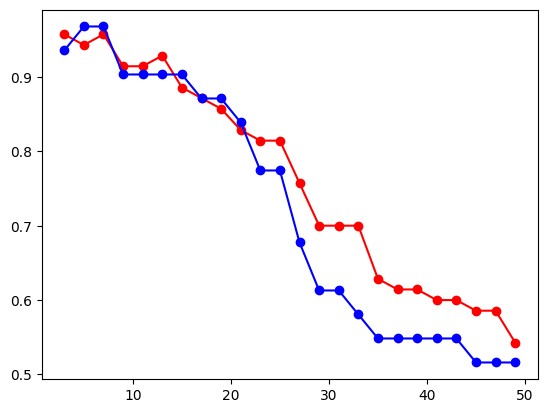

In [113]:
# train accuracy plot 
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"ro-")

# test accuracy plot
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"bo-")

 On the basis of graph we find that k=7 is the best k value(shortest distance) where, test accuracy = 90%, train accuracy = 87% they both are close enough.
#Note: Training accuracy and test accuracy should close like , 98%-97%, not 80%-60%, if equals then good
